In [11]:
%matplotlib inline

from __future__ import print_function, division

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as pl
import sys
from scipy.misc import logsumexp

In [12]:
def logtrapz(lnf, dx):
    return np.log(dx/2.) + logsumexp([logsumexp(lnf[:-1]), logsumexp(lnf[1:])])

In [89]:
from scipy.special import erf

ndp = 10

#hs = [0.001, 0.01, 0.1, 1., 10., 20., 50.]
h = 10.

sigmas = [0.1, 1., 5., 10.]

C = 100.
hvals = np.linspace(0., C, 5000)

kldivs = []
#for h in hs:
for sigma in sigmas:
    #sigma = 1.
    d = h + sigma*np.random.randn(10)

    loglike = np.zeros((len(hvals),))
    for dval in d:
        loglike = loglike - (0.5*(dval-hvals)**2/sigma**2) - 0.5*np.log(2.*np.pi*sigma**2)

    logprior = -np.log(C)
    logevd = logtrapz(loglike+logprior, hvals[1]-hvals[0])
    logpost = loglike+logprior-logevd

    #ev = 0.5*(erf(0.5*np.sqrt(2.)*d/sigma) + erf(0.5*np.sqrt(2.)*(C-d)/sigma))

    kldivergence = np.sum(np.exp(logpost)*(logpost-logprior))
    kldivs.append(kldivergence)
    
#print(logevd, file=sys.stdout)
#print(kldivergence, file=sys.stdout)

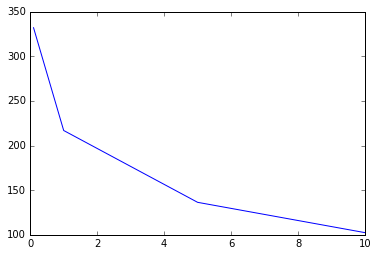

In [91]:
#pl.semilogx(hs, kldivs)
pl.plot(sigmas, kldivs)

In [34]:
from sympy import *

In [36]:
x, y, z = symbols('x y z')
integrate(exp(-(x-y)**2/(2*z**2))/sqrt(2*pi*z**2), (y, 0, 100))

z*erf(sqrt(2)*x/(2*z))/(2*sqrt(z**2)) + z*erf(sqrt(2)*(-x + 100)/(2*z))/(2*sqrt(z**2))